CREDIT FRAUD DETECTION 

In the given dataset the names of the features are not given due to confidential reasons by the dataset provider. We will be using neural networks to detect whether the transaction is fraud or not fraud.

In [57]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings

In [58]:
df = pd.read_csv('creditcard.csv')

Phase 1: Data Analysis

In [59]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [60]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [61]:
print('Non Fraud transaction percentage is:', df['Class'].value_counts()[0]/len(df) * 100,'%')
print('Fraud transaction percentage is:', df['Class'].value_counts()[1]/len(df) * 100,'%')

Non Fraud transaction percentage is: 99.82725143693798 %
Fraud transaction percentage is: 0.1727485630620034 %


Text(0.5, 1.0, '0 -> Non Fraud, 1 -> Fraud \n (Non Fraud vs Fraud)')

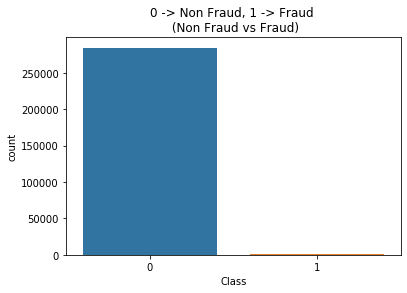

In [62]:
sns.countplot('Class', data=df)
plt.title('0 -> Non Fraud, 1 -> Fraud \n (Non Fraud vs Fraud)')

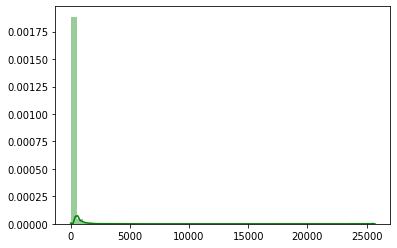

In [63]:
amount_dis = df['Amount'].values
sns.distplot(amount_dis, color='g')
plt.show()

Let's scale time and amount as well for helping our algorithms predict better in the future when we use them.

In [64]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()
df['amount_scaled'] = scaler_robust.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = scaler_robust.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [65]:
amount_scaled = df['amount_scaled']
time_scaled = df['time_scaled']
df.drop(['amount_scaled', 'time_scaled'], axis=1, inplace=True)
df.insert(0, 'amount_scaled', amount_scaled)
df.insert(1, 'time_scaled', time_scaled)
df.head()

,amount_scaled,time_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Random undersampling: We will now create a sub sample dataframe which has equal number of fraud and non fraud cases. This is done in order to avoid overfitting and avoiding observing wrong correlations. 

In [66]:
df = df.sample(frac=1)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
print(new_df.shape)

(984, 31)


In [67]:
new_df.head()

,amount_scaled,time_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
122163,2.693495,-0.096735,-0.781222,-0.411711,1.397606,-1.601332,-0.789897,-0.369548,0.884406,-0.182146,...,0.099484,-0.391287,-1.106639,0.539911,-0.138367,-0.458486,0.593055,-0.021730,0.138954,0
254395,-0.201355,0.846086,0.202402,1.176270,0.346379,2.882138,1.407133,-0.504355,1.438537,-0.395603,...,-0.206239,0.242560,0.841230,-0.370157,-0.026012,0.491954,0.234576,-0.279788,-0.331933,1
226516,-0.139733,0.704543,0.097386,1.022749,-0.135297,0.430845,-0.491742,-1.602051,0.256224,0.225063,...,-0.270652,0.077324,0.207559,0.257809,0.830990,-0.859475,0.115472,-0.090797,-0.033248,0
239501,3.007895,0.768888,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,...,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1
141258,-0.307413,-0.005733,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,...,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


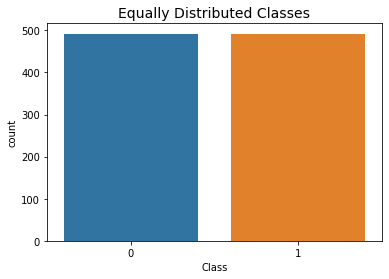

In [68]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Correlation matrices: 

Covariance matrices help us determine which features influence our process of fraud detection in a positive or negativw way.

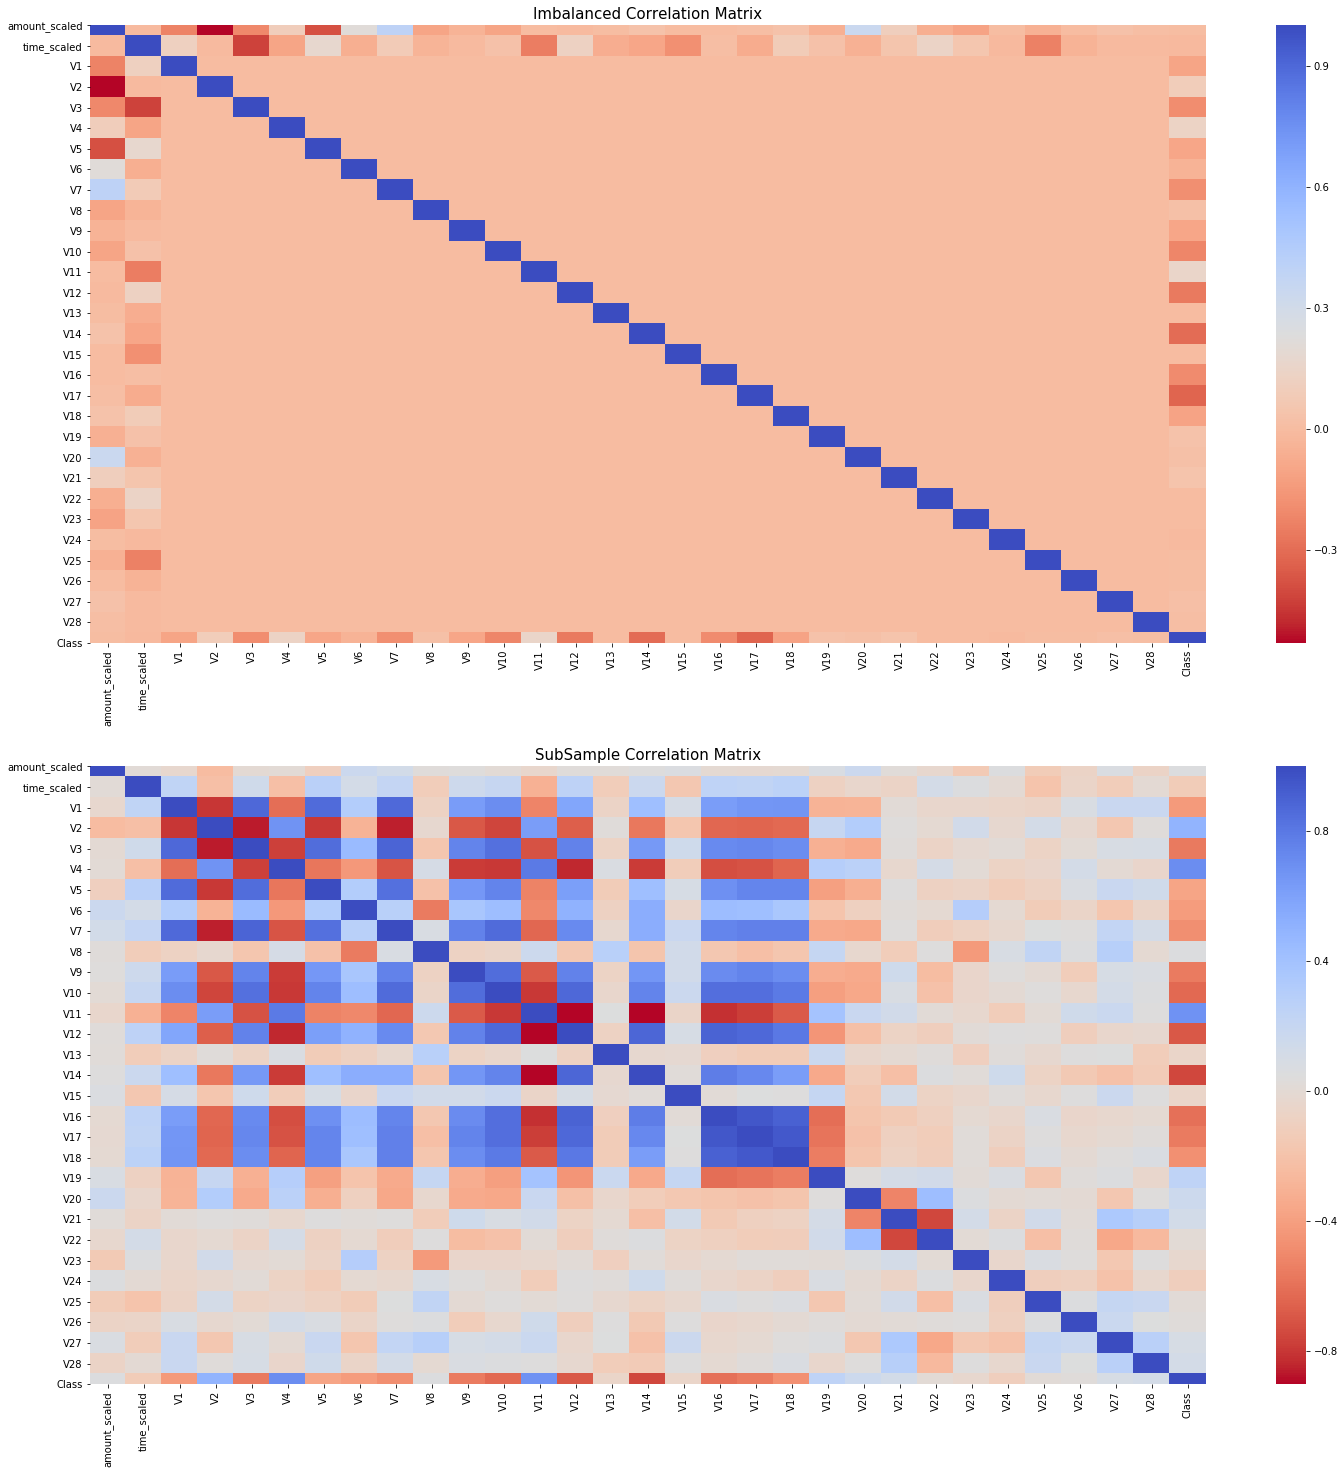

In [69]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 25))

#For imablanaced original dataframe
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax= ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize= 15)
#For sub sampled dataframe (balanced)
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax= ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize= 15)
plt.show()

Negatively correlated features can be viewed: V14, V12, V10, V7

Positively correlated features can be viewed: V2, V4, V11, V19








Let's remove extreme outliers from features that have a high correlation with our classes. 

This will have a positive impact on the results provided by our models.

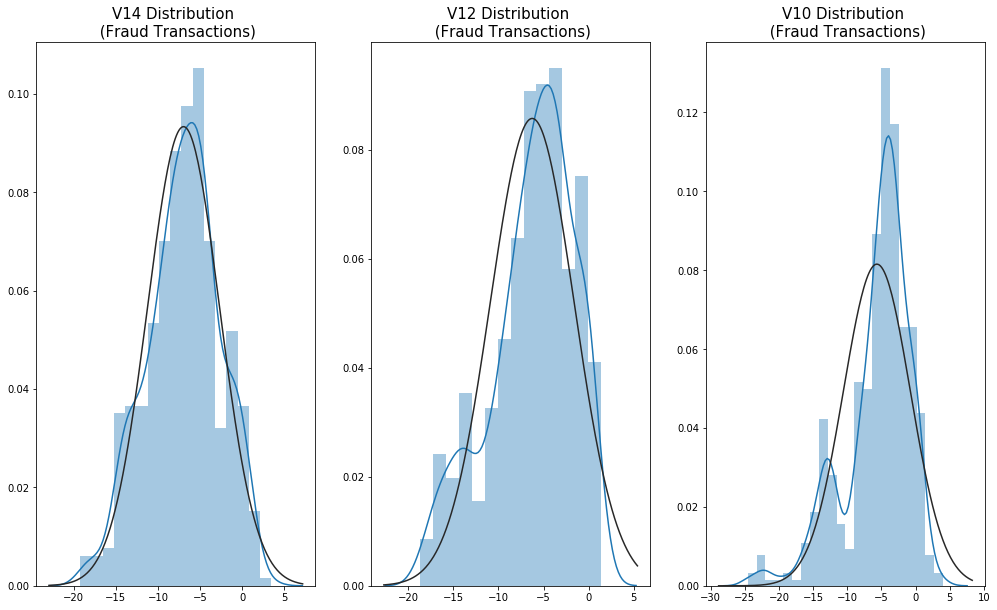

In [70]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 10))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax= ax1, fit= norm)
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize= 15)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax= ax2, fit= norm)
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize= 15)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax= ax3, fit= norm)
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize= 15)

plt.show()

Interquartile Range (IQR): We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.

In [75]:
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.346923983973717 | Quartile 75: -4.288310278376983
iqr: 5.058613705596734
Cut Off: 7.587920558395101
V14 Lower: -16.93484454236882
V14 Upper: 3.2996102800181184
Feature V14 Outliers for Fraud Cases: 3
V10 outliers:[-17.230202160711, -17.4759212828566, 3.4424219959421496]
Number of Instances after outliers removal: 931


In [76]:
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V12 Lower: -15.384267148560879
V12 Upper: 4.789137796888039
V12 outliers: [-15.717606646877199, -16.218610393127, -17.1504052507291, -17.003289445516, -15.479052483201599, -15.969207520809, -15.5316111795156, -15.5316111795156, -17.003289445516, -17.1829184301947, -15.835718807734402, -17.1829184301947]
Feature V12 Outliers for Fraud Cases: 12
Number of Instances after outliers removal: 919


In [77]:
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V10 Lower: -12.222491731417986
V10 Upper: 3.6948879529467673
V10 outliers: [-13.0740681657723, -13.3482776536659, -12.835737682533901, -12.981619145004, -13.002709301069698, -12.8881582878915, -13.386683439524601, -12.6959474039839, -14.110184441545698, -13.175198078736, -12.916636109170899, 4.03143505114991, -13.0094028057641, -13.6705451263516, -14.166794659606, -12.2653238444006, -12.9389293107706, -14.557159052885899, -13.2616517082667, -14.226698057528699, -12.780633936202099, -12.805683189811699, -12.8306571996417, -13.608143162727899, -13.0888909176936, -12.7447607871859, -13.2151722995049]
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 891


SMOTE(Over-sampling):

Smote is an oversampling technique which creates new data points for the mimnority class. 
There is a time/accuracy tradeoff though as more data is added, so, the accuracy is better as compared to undersampling but the training time increases.

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [94]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [95]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train_res.shape[1]

model = Sequential([
    Dense(n_inputs, input_shape= (n_inputs, ), activation= 'relu'),
    Dense(32, activation= 'relu'),
    Dense(2, activation= 'softmax')
])

In [96]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(Adam(lr= 0.001), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [98]:
model.fit(X_train_res, y_train_res, validation_split= 0.2, batch_size=25, epochs= 20, shuffle= True, verbose= 2)

Train on 363921 samples, validate on 90981 samples
Epoch 1/20
 - 23s - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2/20
 - 21s - loss: 0.0073 - accuracy: 0.9981 - val_loss: 0.0030 - val_accuracy: 0.9996
Epoch 3/20
 - 21s - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.0020 - val_accuracy: 0.9999
Epoch 4/20
 - 21s - loss: 0.0046 - accuracy: 0.9990 - val_loss: 1.5093e-04 - val_accuracy: 1.0000
Epoch 5/20
 - 20s - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/20
 - 21s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 5.8969e-04 - val_accuracy: 1.0000
Epoch 7/20
 - 20s - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 8/20
 - 22s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 9/20
 - 21s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0014 - val_accuracy: 0.9999
Epoch 10/20
 - 21s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 6.6218e-04 - val_accuracy: 1.0

In [102]:
predictions = model.predict(X_test, batch_size= 200, verbose= 0)

In [103]:
fraud_predictions = model.predict_classes(X_test, batch_size= 200, verbose= 0)

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, fraud_predictions)
print('Predicted confusion Matrix:')
print(cm)

Predicted confusion Matrix:
[[56820    44]
 [   17    81]]
